In [8]:
import numpy as np
import pandas as pd
import os,sys

In [9]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')
fishing_data_path = os.path.join(path_data,'fishing_activity')

In [10]:
region = 'North America'
if region == 'Asia':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = 100, 140
elif region == 'North America':
    lat_min_data, lat_max_data = 0, 40
    lon_min_data, lon_max_data = -100, -60
years = np.arange(2012,2019)

In [11]:
mean_fishing_years = []
for year in years:
    # load data
    fishing_activity_year = pd.read_csv(os.path.join(fishing_data_path,'fishing_activity_{}.csv'.format(year)))
    # filter by region
    fishing_activity_year = fishing_activity_year[(fishing_activity_year['lat_bin'] >= lat_min_data) & (fishing_activity_year['lat_bin'] <= lat_max_data) & (fishing_activity_year['lon_bin'] >= lon_min_data) & (fishing_activity_year['lon_bin'] <= lon_max_data)]
    # calculate mean fishing activity
    mean_fishing_year = fishing_activity_year['fishing_hours'].mean()
    mean_fishing_years.append(mean_fishing_year)
print(mean_fishing_years)

[104.72110600255344, 167.95802361446076, 174.54470844318183, 202.0182485600989, 253.22339820645814, 294.1274545260442, 305.01262840455837]


In [12]:
# save mean fishing activity
mean_fishing_years = np.array(mean_fishing_years)
np.save(os.path.join(path_data,'mean_fishing_activity_{}.npy'.format(region)),mean_fishing_years)

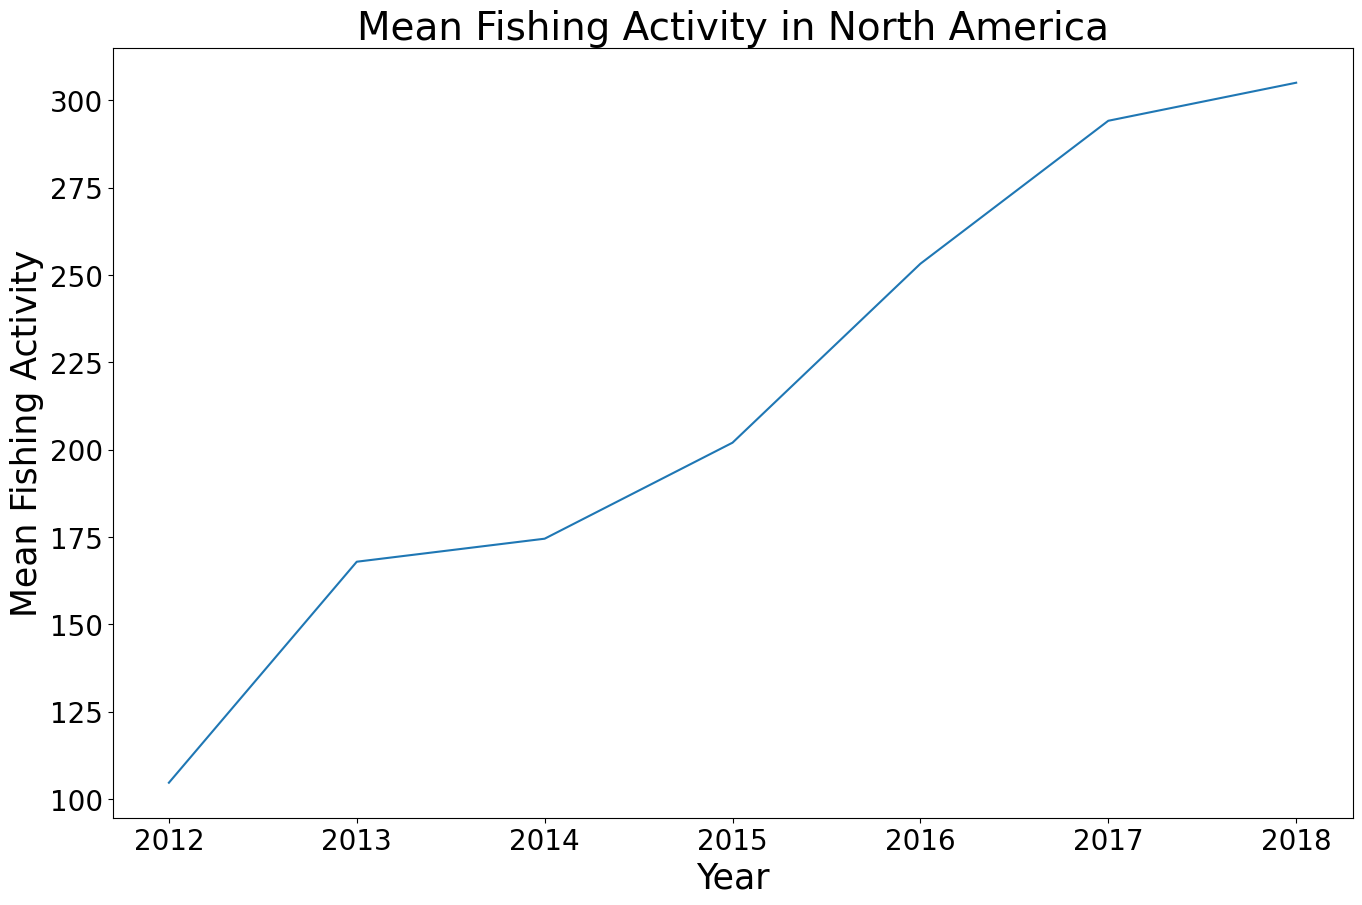

In [13]:
# plot mean fishing activity
import matplotlib.pyplot as plt
fontsize = 25
fontsize_title = 28
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(years, mean_fishing_years)
ax.set_xlabel('Year', fontsize=fontsize)
ax.set_ylabel('Mean Fishing Activity', fontsize=fontsize)
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.set_title('Mean Fishing Activity in {}'.format(region), fontsize=fontsize_title)
ax.tick_params(axis='both', which='major', labelsize=20)

# save figure
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
save_fig_path = os.path.join(save_fig_folder,'mean_fishing_activity_{}.png'.format(region))
plt.savefig(save_fig_path)
plt.show()